(60,)
(60,)
(60,)


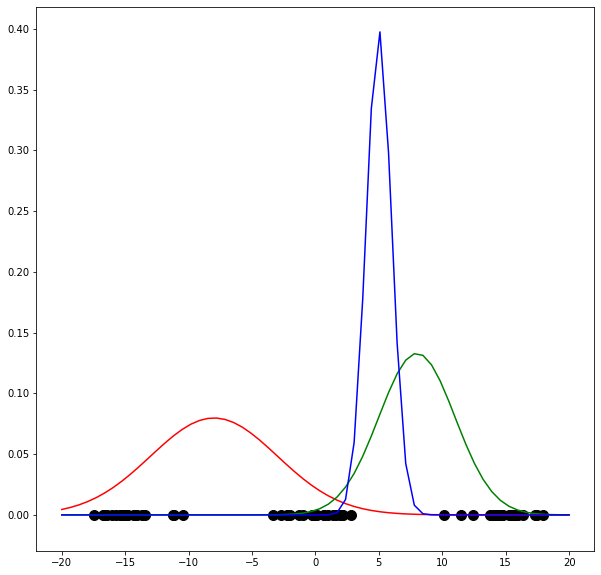

(60,)
(60,)
(60,)


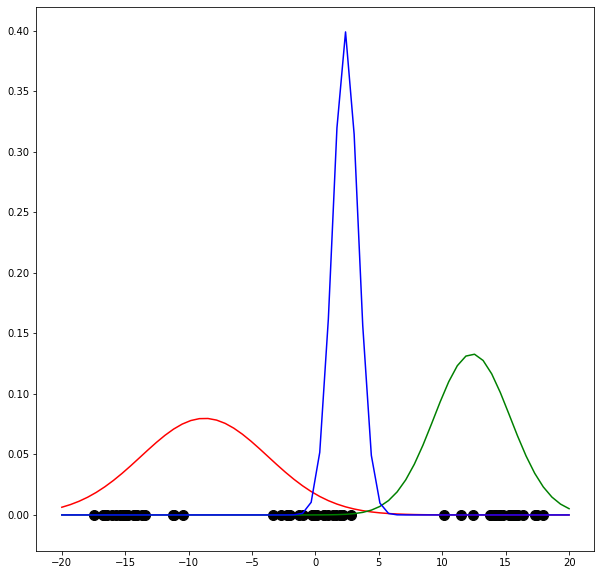

(60,)
(60,)
(60,)


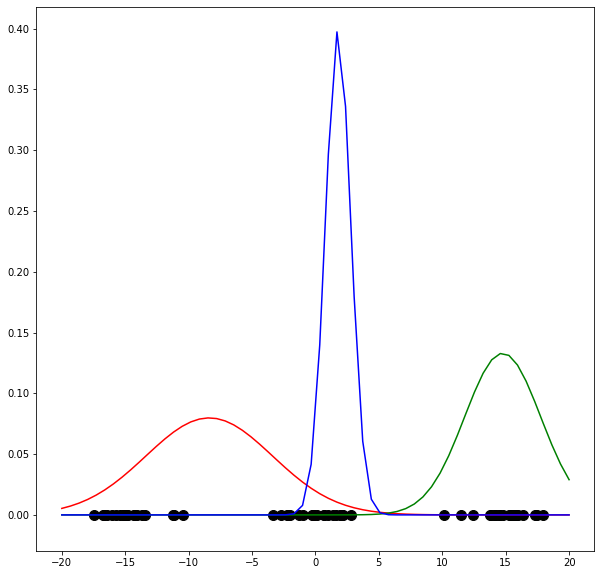

(60,)
(60,)
(60,)


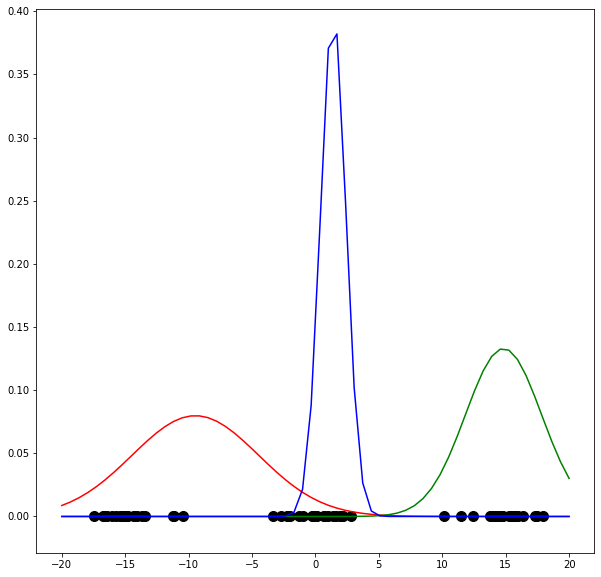

(60,)
(60,)
(60,)


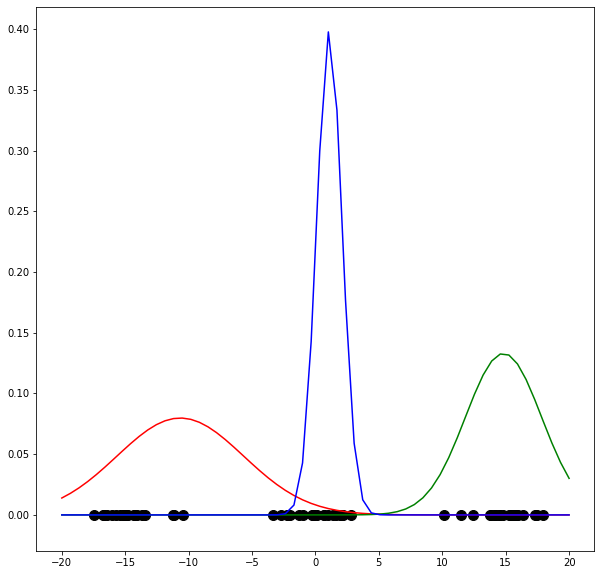

(60,)
(60,)
(60,)


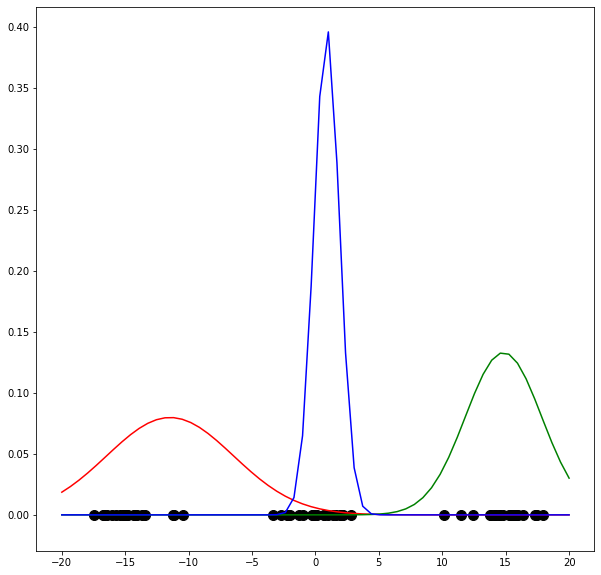

(60,)
(60,)
(60,)


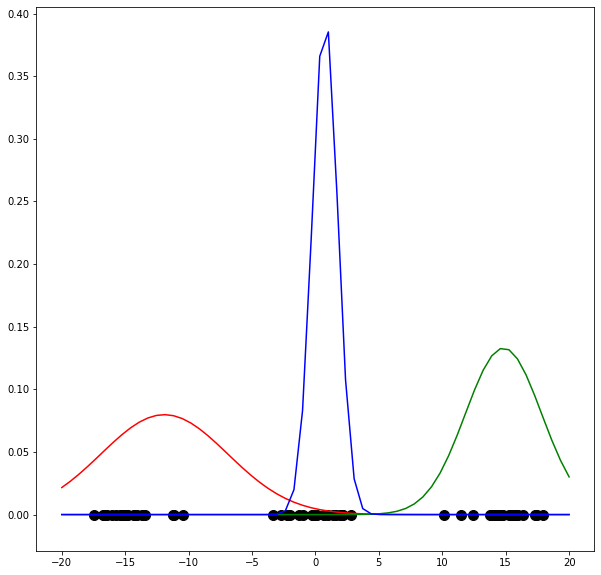

(60,)
(60,)
(60,)


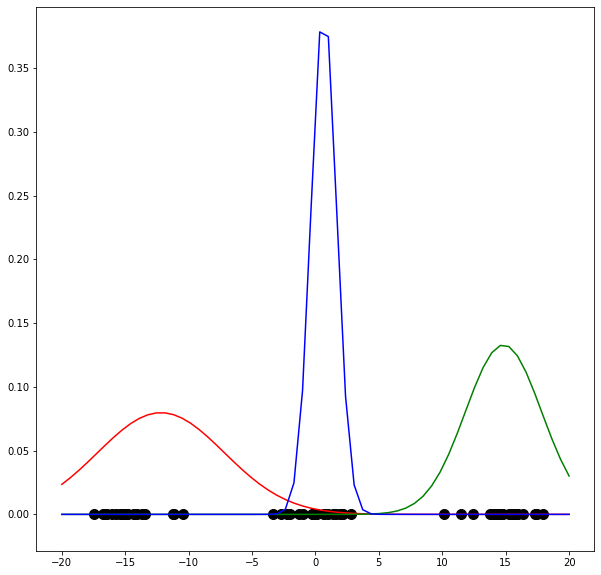

(60,)
(60,)
(60,)


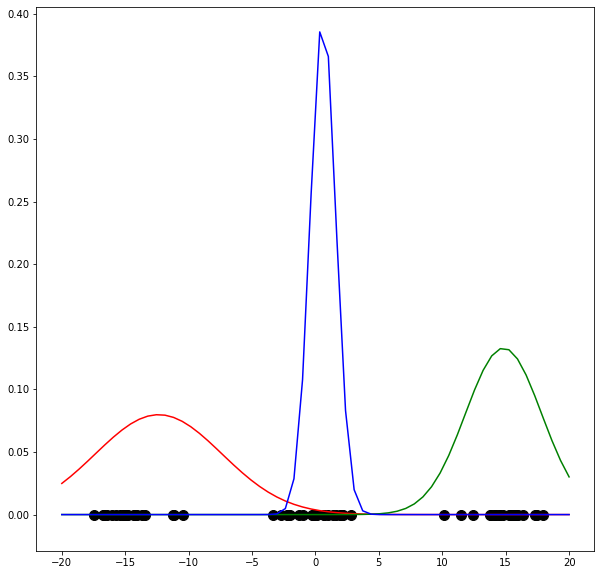

(60,)
(60,)
(60,)


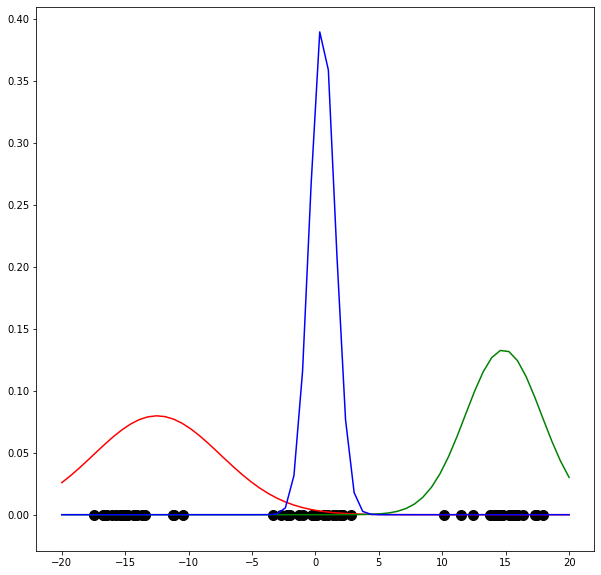

In [31]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger 
matplotlib_axes_logger.setLevel('ERROR')

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import norm
np.random.seed(0)
import pickle
 
url = '/home/abhishek/dev/Semester_2/SMAI/Assignments/Assignment_2/Datasets/Question-2/'

def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()


# data = load(url+"dataset1.pkl")

X0 = np.array(load(url+"dataset1.pkl")) # Create data cluster 1
X0 = X0[:,0]
X1 = np.array(load(url+"dataset2.pkl")) # Create data cluster 2
X1 = X1[:,0]
X2 = np.array(load(url+"dataset3.pkl")) # Create data cluster 3
X2 = X2[:,0]
X_tot = np.stack((X0,X1,X2)).flatten()


class GMM1D:
    def __init__(self,X,iterations,mu,pi,var):
        """initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f] """    
        self.iterations = iterations
        self.X = X
        self.mu = mu
        self.pi = pi
        self.var = var
    
    """E step"""

    def calculate_prob(self,r):

        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            
            print(self.X.shape)
            r[:,c] = p*g.pdf(self.X)
            
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
            r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i])
            pass
        return r
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
#             print("Hrere")
            ax0.scatter(self.X[i],0,c=np.array([r[i][0],r[i][1],r[i][2]])/255,s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
#             print("herer 2")
            ax0.plot(np.linspace(-20,20,num=60),g,c=c)
    
    def run(self):

        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            self.plot(r)
            
            """M-Step"""

            """calculate m_c"""
            m_c = []
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m)
            
            """calculate pi_c"""
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c)) 
            
            """calculate mu_c"""
            # write code here
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c


            """calculate var_c"""
            var_c = []
            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))

            plt.show()



g1 = GMM1D(X0,10,[-8,8,5],[1/3,1/3,1/3],[5,3,1]) 
g1.run()


# g2 = GMM1D(X1,10,[-8,8,5],[1/3,1/3,1/3],[5,3,1]) 
# g2.run()


# g3 = GMM1D(X2,10,[-8,8,5],[1/3,1/3,1/3],[5,3,1]) 
# g3.run()


(60,)
(60,)
(60,)


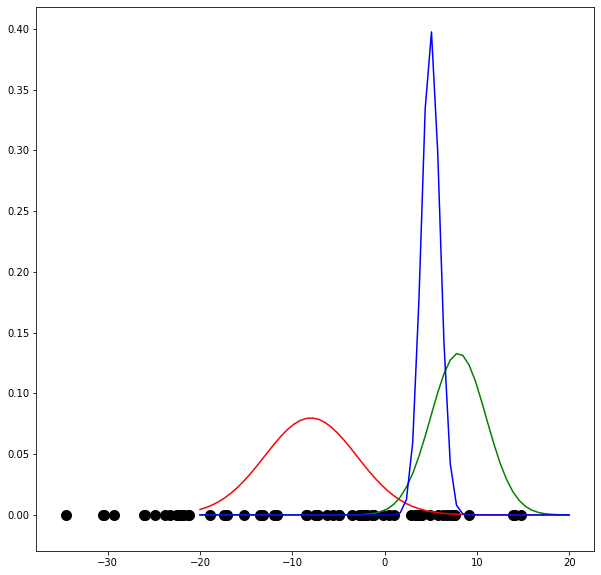

(60,)
(60,)
(60,)


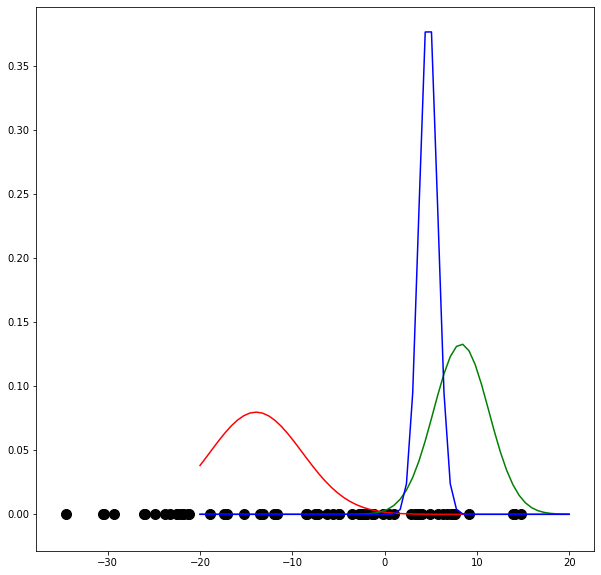

(60,)
(60,)
(60,)


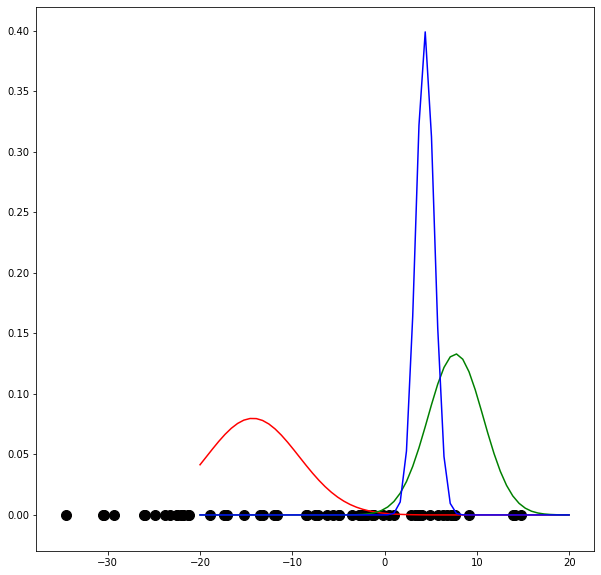

(60,)
(60,)
(60,)


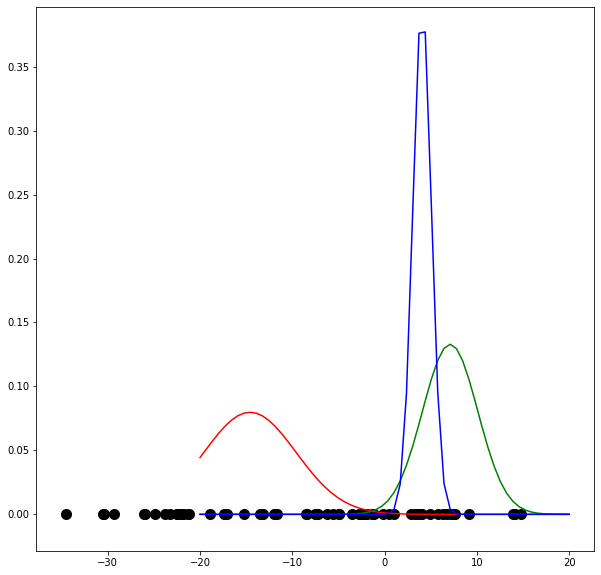

(60,)
(60,)
(60,)


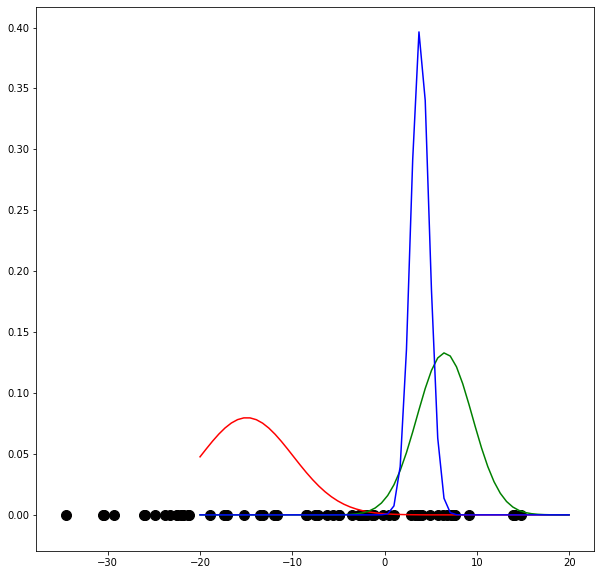

(60,)
(60,)
(60,)


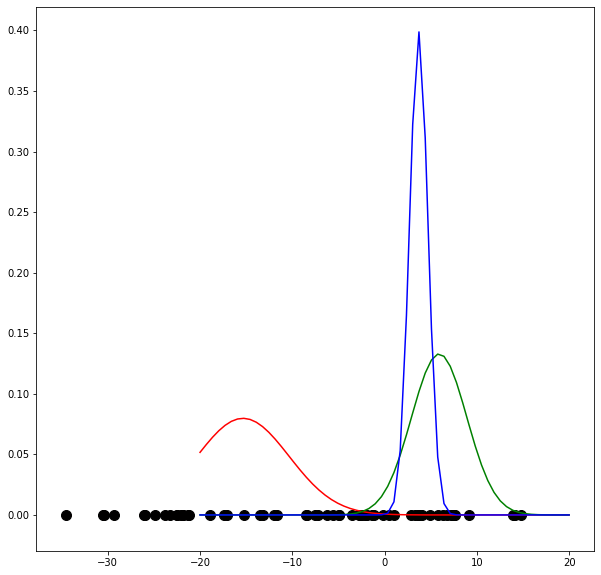

(60,)
(60,)
(60,)


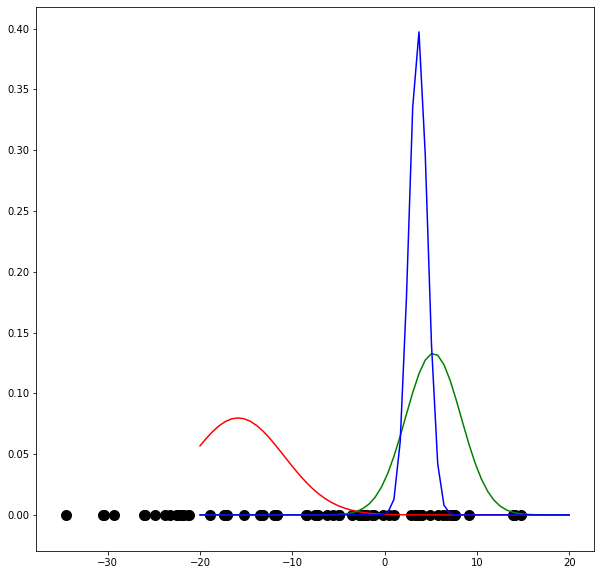

(60,)
(60,)
(60,)


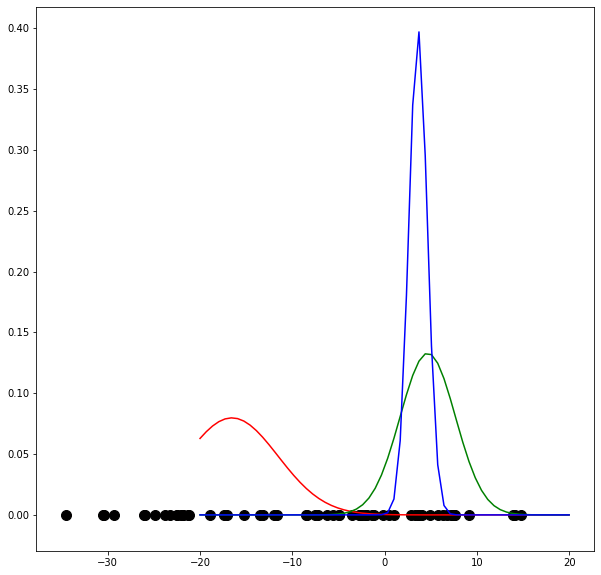

(60,)
(60,)
(60,)


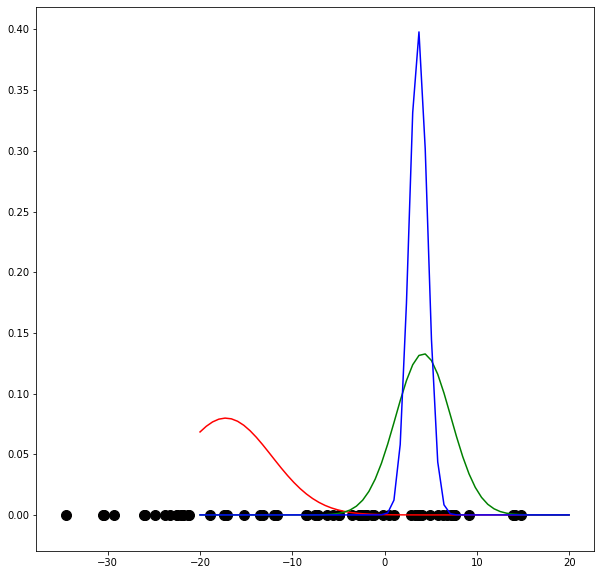

(60,)
(60,)
(60,)


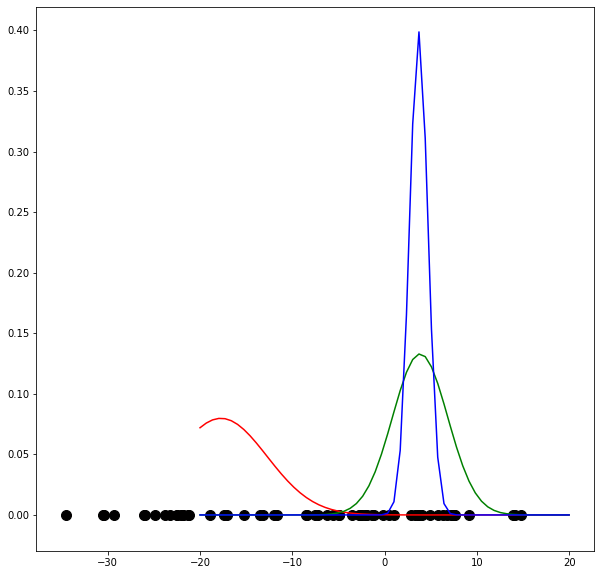

In [32]:
g1 = GMM1D(X1,10,[-8,8,5],[1/3,1/3,1/3],[5,3,1]) 
g1.run()

(60,)
(60,)
(60,)


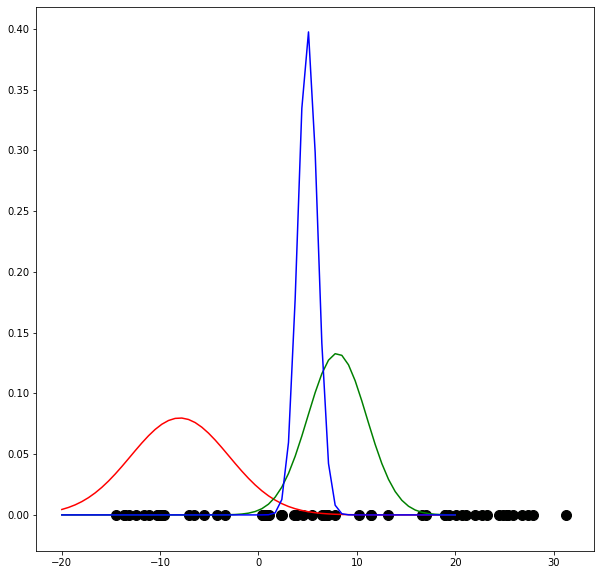

(60,)
(60,)
(60,)


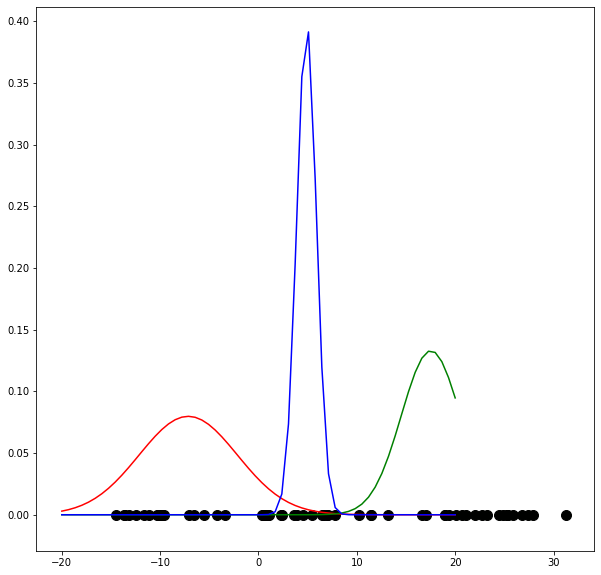

(60,)
(60,)
(60,)


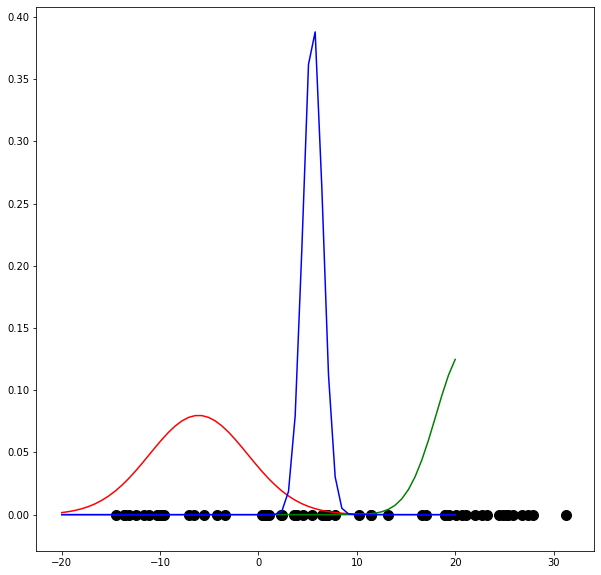

(60,)
(60,)
(60,)


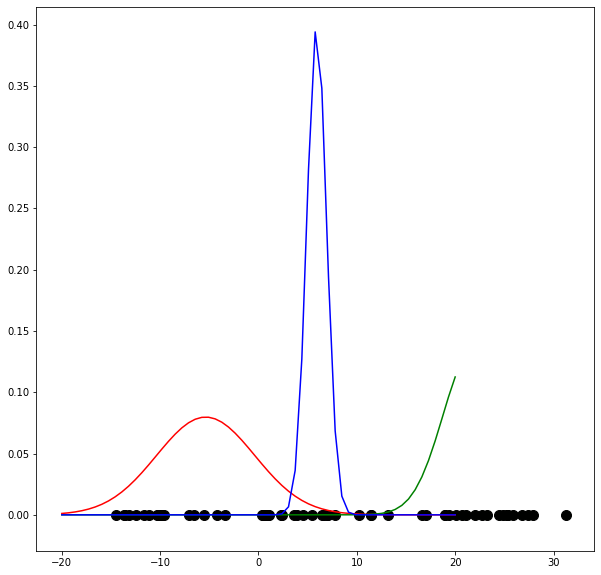

(60,)
(60,)
(60,)


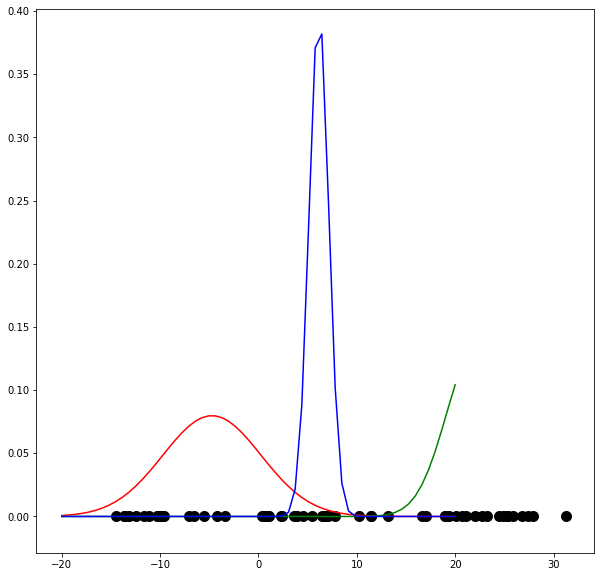

(60,)
(60,)
(60,)


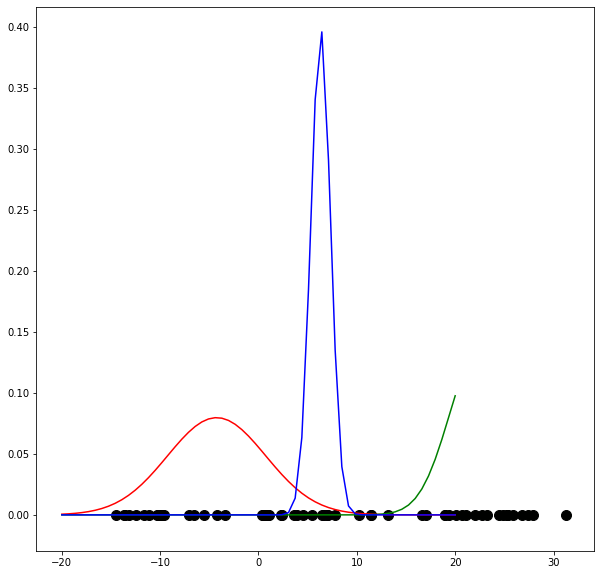

(60,)
(60,)
(60,)


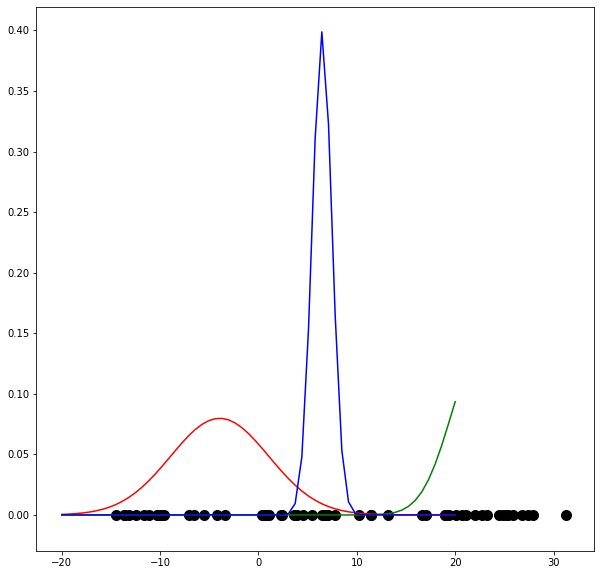

(60,)
(60,)
(60,)


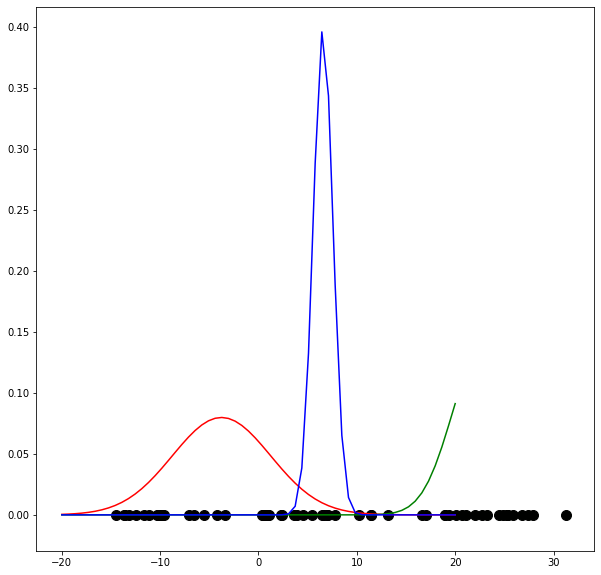

(60,)
(60,)
(60,)


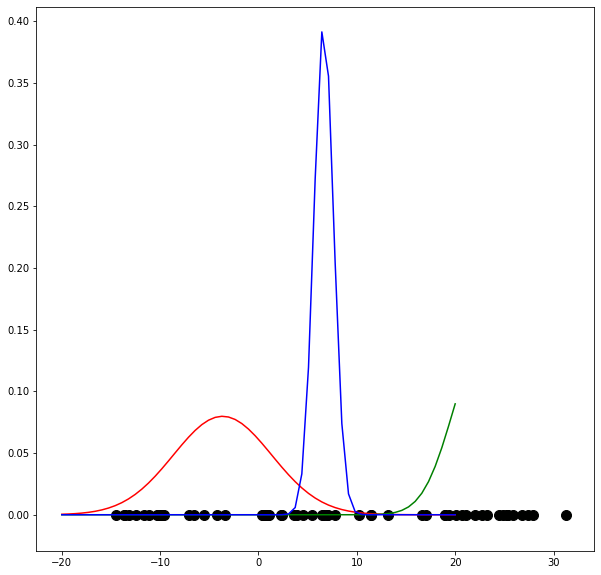

(60,)
(60,)
(60,)


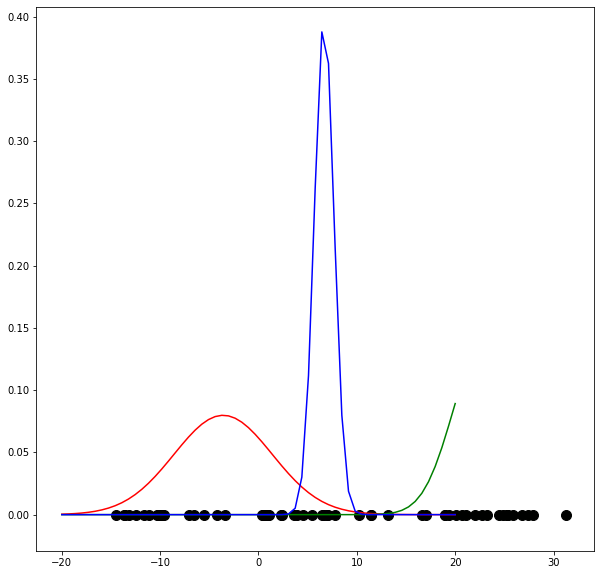

In [33]:
g1 = GMM1D(X2,10,[-8,8,5],[1/3,1/3,1/3],[5,3,1]) 
g1.run()